# Challenge 

Create a machine-learning model that predicts the price range of a property based on the information available. The data set contains 10,000 rows (1 row for each property). After training, you should export your model (with all other components you might need) and deploy it into a function or app. 

In [1]:
# libraries
import pandas as pd
import seaborn as sns
import re

In [2]:
df = pd.read_csv("train.csv")
print(df.describe())
print(df.shape)

                uid      latitude     longitude  garageSpaces     yearBuilt  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    7626.621900     30.291191    -97.778476      1.229600   1988.570400   
std     4380.486852      0.097075      0.084543      1.328179     21.515272   
min        1.000000     30.085030    -98.020477      0.000000   1905.000000   
25%     3838.750000     30.202516    -97.838594      0.000000   1975.000000   
50%     7603.500000     30.283664    -97.769680      1.000000   1993.000000   
75%    11435.750000     30.366375    -97.718313      2.000000   2006.000000   
max    15170.000000     30.517323    -97.570633     22.000000   2020.000000   

       numOfPatioAndPorchFeatures   lotSizeSqFt  avgSchoolRating  \
count                10000.000000  1.000000e+04     10000.000000   
mean                     0.667200  2.071028e+04         5.766236   
std                      0.986378  4.488338e+05         1.861940   
min             

In [3]:
df.isna().sum()

uid                           0
city                          0
description                   1
homeType                      0
latitude                      0
longitude                     0
garageSpaces                  0
hasSpa                        0
yearBuilt                     0
numOfPatioAndPorchFeatures    0
lotSizeSqFt                   0
avgSchoolRating               0
MedianStudentsPerTeacher      0
numOfBathrooms                0
numOfBedrooms                 0
priceRange                    0
dtype: int64

In [4]:
print(df.duplicated().sum())

0


Aditionally, walk us through your approach to applying NLP to our property dataset, specifically focusing on the description field. How you would preprocess the text and then proceed through feature extraction, integration with other features and model training,

In [5]:
print(df.dtypes)

uid                             int64
city                           object
description                    object
homeType                       object
latitude                      float64
longitude                     float64
garageSpaces                    int64
hasSpa                           bool
yearBuilt                       int64
numOfPatioAndPorchFeatures      int64
lotSizeSqFt                   float64
avgSchoolRating               float64
MedianStudentsPerTeacher        int64
numOfBathrooms                float64
numOfBedrooms                   int64
priceRange                     object
dtype: object


In [6]:
df.priceRange.unique()

array(['650000+', '350000-450000', '0-250000', '450000-650000',
       '250000-350000'], dtype=object)

<Axes: ylabel='priceRange'>

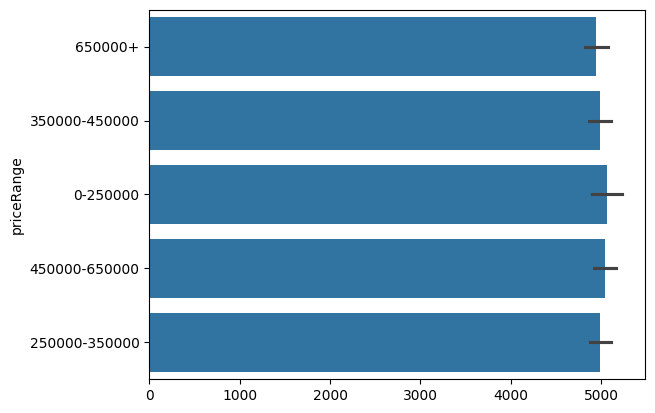

In [7]:
sns.barplot(df.priceRange)

In [8]:
df_two = df.dropna().copy()
df_two.shape

(9999, 16)

In [9]:
df.description.head(3)

0    MULTIPLE OFFERS submit best & final to Agent b...
1    4644 Hoffman Dr, Austin, TX 78749 is a single ...
2    6804 Canal St, Austin, TX 78741 is a single fa...
Name: description, dtype: object

In [10]:
import nltk

# Download the necessary NLTK data files
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/curcuqui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/curcuqui/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/curcuqui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
df_two["description"] = df_two["description"].str.lower()

In [12]:
df_two["description"] = df_two["description"].apply(lambda x: re.sub(r"[^a-z\s$!]", "", x))
df_two.description.head(3)

0    multiple offers submit best  final to agent by...
1     hoffman dr austin tx  is a single family home...
2     canal st austin tx  is a single family home t...
Name: description, dtype: object

In [13]:
from nltk.tokenize import word_tokenize

df_two["description"] = df_two["description"].apply(word_tokenize)

In [14]:
print(df_two["description"].head(5))

0    [multiple, offers, submit, best, final, to, ag...
1    [hoffman, dr, austin, tx, is, a, single, famil...
2    [canal, st, austin, tx, is, a, single, family,...
3    [beautiful, large, lot, with, established, tre...
4    [stunning, nw, hills, designer, remodel, by, c...
Name: description, dtype: object


In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
df_two["description"] = df_two["description"].apply(lambda x: [word for word in x if word not in stop_words])

In [16]:
from nltk.stem import PorterStemmer
# Stem each token to reduce words to their base form
stemmer = PorterStemmer()
df_two["description"]= df_two["description"].apply(lambda x: [stemmer.stem(word) for word in x])
print(df_two["description"].head(5))

0    [multipl, offer, submit, best, final, agent, m...
1    [hoffman, dr, austin, tx, singl, famili, home,...
2    [canal, st, austin, tx, singl, famili, home, c...
3    [beauti, larg, lot, establish, tree, love, lig...
4    [stun, nw, hill, design, remodel, cedar, oak, ...
Name: description, dtype: object


In [17]:
# Rejoin tokens into a single string for feature extraction
df_two["description"] = df_two["description"].apply(lambda x: " ".join(x))

In [18]:
df_two["description"] 

0       multipl offer submit best final agent mon st p...
1       hoffman dr austin tx singl famili home contain...
2       canal st austin tx singl famili home contain s...
3       beauti larg lot establish tree love light fill...
4       stun nw hill design remodel cedar oak home won...
                              ...                        
9995    updat great hill opportun ! larg corner lot ma...
9996    ador heart south austin ! situat larg corner l...
9997    gain mill ln austin tx singl famili home conta...
9998    doe valley ln austin tx singl famili home cont...
9999    beauti singlestori home open floor plan great ...
Name: description, Length: 9999, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with bigrams, min_df, and max_df to focus on relevant terms
vectorizer = CountVectorizer(min_df=1, max_df=0.9, ngram_range=(1, 2))

In [20]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Convertir las categorías a valores numéricos
df_two['priceRange'] = label_encoder.fit_transform(df_two['priceRange'])
df_two['priceRange'].head(5)

0    4
1    2
2    0
3    0
4    4
Name: priceRange, dtype: int64

In [21]:
for idx, clase in enumerate(label_encoder.classes_):
    print(f"{clase} => {idx}")

0-250000 => 0
250000-350000 => 1
350000-450000 => 2
450000-650000 => 3
650000+ => 4


In [39]:
# Fit and transform the message column
X = vectorizer.fit_transform(df_two["description"])
y = df_two['priceRange']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_two["description"], y, test_size=0.1, random_state=42  
)

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Build the pipeline by combining vectorization and classification
pipeline = Pipeline([
    ("vectorizer", vectorizer),
    ("classifier", MultinomialNB())
])

In [48]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    "classifier__alpha": [0.01, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1.0]
}

# Perform the grid search with 5-fold cross-validation and the F1-score as metric
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=10,
    scoring="f1_macro"
)

# Fit the grid search on the full dataset
grid_search.fit(X_train, y_train)

# Extract the best model identified by the grid search
best_model = grid_search.best_estimator_
print("Best model parameters:", grid_search.best_params_)

Best model parameters: {'classifier__alpha': 0.1}


In [49]:
X_new = best_model.named_steps["vectorizer"].transform(X_test)
y_pred = best_model.named_steps["classifier"].predict(X_new)

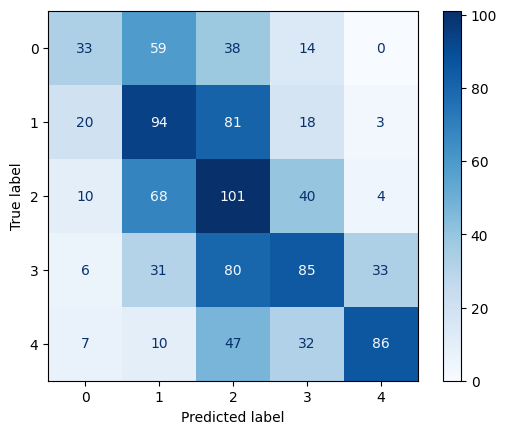

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")

In [51]:
from sklearn.metrics import precision_score, recall_score

# Calcular precisión y recall
precision = precision_score(y_test, y_pred, average='macro')  # Cambia 'macro' según lo que necesites
recall = recall_score(y_test, y_pred, average='macro')

print("Precisión (macro):", precision)
print("Recall (macro):", recall)

Precisión (macro): 0.4432661133931739
Recall (macro): 0.3902992500490353


In [52]:
import joblib

# Save the trained model to a file for future use
model_filename = 'full.joblib'
joblib.dump(best_model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to full.joblib
